In [1]:
from core.TrajectoryDF import NumPandasTraj as TrajDF
from features.spatial_features import SpatialFeatures as spatial
from features.temporal_features import TemporalFeatures as temporal
import matplotlib.pyplot as plt
from preprocessing.interpolation import Interpolation as ip
from preprocessing.filters import Filters as filt
from utilities.conversions import Conversions as con
from preprocessing.helpers import Helpers as help

import utilities.constants as const
import pandas as pd
from scipy.interpolate import CubicSpline, interp2d
import numpy as np

In [2]:
%%time

# atlantic = pd.read_csv('./data/atlantic.csv')
# atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
# def convert_to_datetime(row):
#         this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
#         this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
#         return '{} {}'.format(this_date, this_time)
# atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)
# sample = TrajDF(atlantic,
#                 latitude='Latitude',
#                 longitude='Longitude',
#                 datetime='DateTime',
#                 traj_id='ID',
#                 rest_of_columns=[])
gulls = pd.read_csv('./data/gulls.csv')
sample = TrajDF(gulls,
                latitude='location-lat',
                longitude='location-long',
                datetime='timestamp',
                traj_id='tag-local-identifier',
                rest_of_columns=[])
# rf = pd.read_csv('./data/geolife_sample.csv')
# sample = TrajDF(rf, 'lat', 'lon', 'datetime', 'id')

CPU times: user 314 ms, sys: 23.7 ms, total: 337 ms
Wall time: 336 ms


In [3]:
small = sample.reset_index().loc[sample.reset_index()[const.TRAJECTORY_ID] == '91732'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
a = small.reset_index()[const.DateTime].diff().dt.total_seconds()
print((a > 3600*4).value_counts())


True     1501
False     469
Name: DateTime, dtype: int64


In [4]:
# %%time
#
# small_ip_rw = help._random_walk_help(small.reset_index(drop=True).set_index([const.DateTime]), '91732', 3600*4)
# print(f"Original Length: {len(small)}")
# print(f"Interpolated Length: {len(small_ip_rw)}")
#

In [5]:
# plt.plot(small[const.LAT], small[const.LONG])
#
#

In [6]:
# plt.plot(small_ip_rw[const.LAT], small_ip_rw[const.LONG])
#
#

In [7]:
# %%time
#
# ip_rw = ip.interpolate_position(sample,
#                                 3600*4,
#                                 'random-walk')
# print(f"Original Length: {len(sample)}")
# print(f"Interpolated Length: {len(ip_rw)}")
#

In [8]:
# plt.plot(sample[const.LAT], sample[const.LONG])
#

In [9]:
# plt.plot(ip_rw[const.LAT], ip_rw[const.LONG])
#

In [10]:
# b = sample.reset_index()[const.DateTime].diff().dt.total_seconds()
# print((b > 3600*4).value_counts())

In [11]:
small_ip_kin = help._kinematic_help(small.reset_index(drop=True).set_index([const.DateTime]), '91732', 3600*4)
print(f"Original Length: {len(small)}")
print(f"Interpolated Length: {len(small_ip_kin)}")
small_ip_kin.sort_values(const.DateTime).head(10)

Original Length: 1970
Interpolated Length: 3470


,traj_id,lat,lon
DateTime,,,
2009-05-27 14:00:00,91732,61.247830,24.586170
2009-05-27 20:00:00,91732,61.232670,24.582170
2009-05-28 00:00:00,91732,61.232670,24.582170
2009-05-28 05:00:00,91732,61.188330,24.531330
2009-05-28 08:00:00,91732,61.232830,24.582000
2009-05-28 12:00:00,91732,61.232831,24.582001
2009-05-28 14:00:00,91732,61.232670,24.582500
2009-05-28 18:00:00,91732,61.232670,24.582500
2009-05-28 20:00:00,91732,61.247670,24.586170


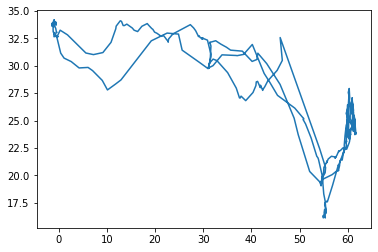

In [12]:
plt.plot(small[const.LAT], small[const.LONG])

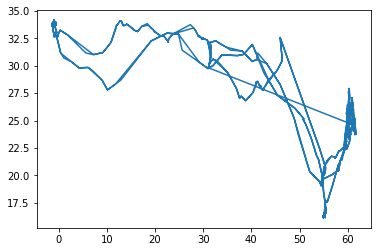

In [13]:
plt.plot(small_ip_kin[const.LAT], small_ip_kin[const.LONG])

In [14]:
ip_kin = ip.interpolate_position(sample,
                                3600*4,
                                'kinematic')
print(f"Original Length: {len(sample)}")
print(f"Interpolated Length: {len(ip_kin)}")

Original Length: 89869
Interpolated Length: 157670


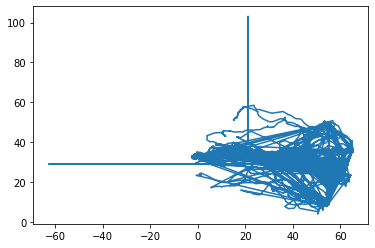

In [15]:
plt.plot(sample[const.LAT], sample[const.LONG])

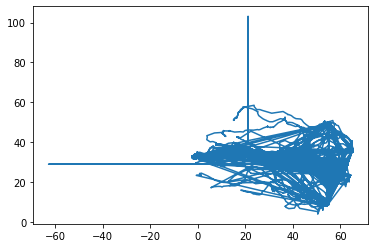

In [16]:
plt.plot(ip_kin[const.LAT], ip_kin[const.LONG])

In [17]:
ip_kin.head(10)


lat        lon
traj_id DateTime                                 
91732   2009-05-27 14:00:00  61.247830  24.586170
        2009-05-27 20:00:00  61.232670  24.582170
        2009-05-28 00:00:00  61.232670  24.582170
        2009-05-28 05:00:00  61.188330  24.531330
        2009-05-28 08:00:00  61.232830  24.582000
        2009-05-28 12:00:00  61.232831  24.582001
        2009-05-28 14:00:00  61.232670  24.582500
        2009-05-28 18:00:00  61.232670  24.582500
        2009-05-28 20:00:00  61.247670  24.586170
        2009-05-29 00:00:00  61.247670  24.586170